In [1]:
#importing liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.decomposition import PCA
from datetime import datetime as dt
from sklearn.model_selection import train_test_split


In [2]:
#importing dataset

score=pd.read_csv("Leads.csv")
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking the dataframes
score.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [4]:
score.shape

(9240, 37)

In [5]:
#Now we prepare data
#1. We check duplicates
score.drop_duplicates(subset='Lead Number')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [6]:
#2. Now we will handle null values
score_null= pd.DataFrame(score.isnull().sum().sort_values())
score_null

,0
Prospect ID,0
I agree to pay the amount through cheque,0
Get updates on DM Content,0
Update me on Supply Chain Content,0
Receive More Updates About Our Courses,0
Through Recommendations,0
Digital Advertisement,0
Newspaper,0
X Education Forums,0
A free copy of Mastering The Interview,0


In [7]:
#dropping the columns with only 0 values
score.loc[:, (score != 0).any(axis=0)]
score.shape

(9240, 37)

In [8]:
"""
Deleting the columns which have one unique values because the are not responsible for success rate
For example

Receive more updates about course
Magazine
I agree to pay amount through cheque
Update on supply chain content
"""

score = score.loc[:,score.nunique()!=1]
score.shape

(9240, 32)

In [9]:
# Deleting "Prospect ID" because it will not affect the prediction

score = score.drop('Prospect ID', axis=1)
score.shape

(9240, 31)

In [10]:
#Deleting "Asymmetrique Profile Score" and "Asymmetrique Activity Score" because they will be represented by their croresponding columns
score = score.drop(["Asymmetrique Profile Score", "Asymmetrique Activity Score"], axis=1)
score.shape

(9240, 29)

In [11]:
#Deleting "How did you hear about X Education" because it has mostly null values which miss lead the prediction
score = score.drop("How did you hear about X Education", axis=1)
score.shape

(9240, 28)

In [12]:
score=score.drop("What matters most to you in choosing a course", axis=1)

In [13]:
#Removing rows where a column has most missing values
score['Lead Source'].isnull().sum()

36

In [14]:
score = score[~pd.isnull(score['Lead Source'])]
score.shape

(9204, 27)

In [15]:
# Now, let's again check which column is containing the most null values
score_null= pd.DataFrame(score.isnull().sum().sort_values(ascending=False))
score_null

,0
Lead Quality,4753
Asymmetrique Profile Index,4201
Asymmetrique Activity Index,4201
Tags,3342
Lead Profile,2709
What is your current occupation,2690
Country,2426
Specialization,1438
City,1420
TotalVisits,130


In [16]:
# The most missing value is in column "Lead Quality" which is 4753. We cannot drop this much rows because it will cause us a huge data loss.
#In place of dropping we will fill the null values with "Unspecified".

score['Lead Quality'].value_counts()

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [17]:
score['Lead Quality'].isnull().sum()

4753

In [18]:
score['Lead Quality'].fillna("Unspecified", inplace=True)
score['Lead Quality'].value_counts()

Unspecified          4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [19]:
# We will do the same for column "Asymmetrique Profile Index" and "Asymmetrique Activity Index"
score['Asymmetrique Profile Index'].value_counts()

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [20]:
score['Asymmetrique Profile Index'].isnull().sum()

4201

In [21]:
score['Asymmetrique Profile Index'].fillna("Unspecified", inplace = True)
score['Asymmetrique Profile Index'].value_counts()

Unspecified    4201
02.Medium      2771
01.High        2201
03.Low           31
Name: Asymmetrique Profile Index, dtype: int64

In [22]:
score['Asymmetrique Activity Index'].value_counts()

02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [23]:
score['Asymmetrique Activity Index'].isnull().sum()

4201

In [24]:
score['Asymmetrique Activity Index'].fillna("Unspecified", inplace=True)
score['Asymmetrique Profile Index'].value_counts()

Unspecified    4201
02.Medium      2771
01.High        2201
03.Low           31
Name: Asymmetrique Profile Index, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Asymmetrique Profile Index'>

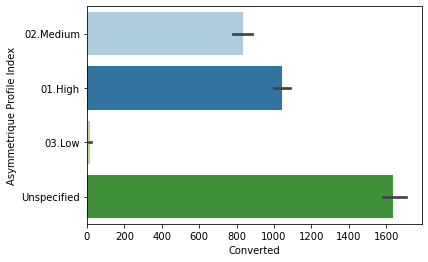

In [25]:
sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='Paired',  data=score, estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Asymmetrique Activity Index'>

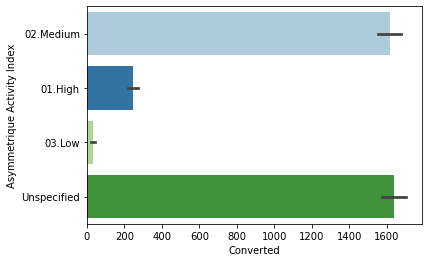

In [26]:
sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='Paired',  data=score, estimator=np.sum)

<AxesSubplot:xlabel='Converted', ylabel='Lead Quality'>

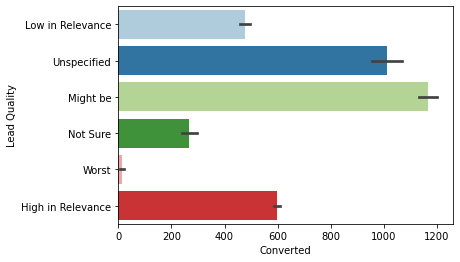

In [27]:
sns.barplot(y='Lead Quality', x='Converted', palette='Paired',  data=score, estimator=np.sum)

In [28]:
# For country we can fill the mode value
score['Country'].value_counts()

India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
score['Country'].mode()

0    India
Name: Country, dtype: object

In [30]:
score.loc[pd.isnull(score['Country']),['Country']]='India'

<AxesSubplot:xlabel='Converted', ylabel='Country'>

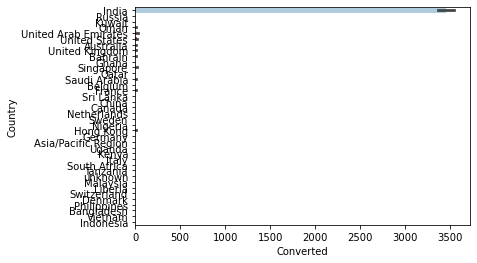

In [31]:
sns.barplot(y='Country', x='Converted', palette='Paired',  data=score, estimator=np.sum)

In [32]:
#As we can see there are more candidates from India so, we will convert other countries in a category "foreign".
score['Country'] = score['Country'].apply(lambda x: 'India' if x=="India" else "Other Country")
score['Country'].value_counts()

India            8917
Other Country     287
Name: Country, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Country'>

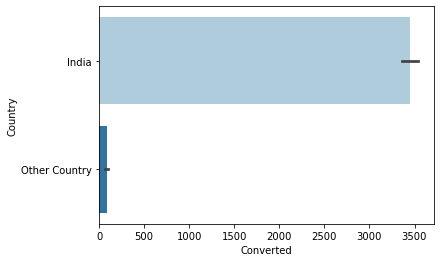

In [33]:
sns.barplot(y='Country', x='Converted', palette='Paired',  data=score, estimator=np.sum)

In [34]:
# For missing values in "total visit" and "Page views per visit" we can use the median value of the column. We are not trying mean because of outliers.
score['TotalVisits'].median()

3.0

In [35]:
score['TotalVisits'].mean()

3.456028212475204

In [36]:
score['TotalVisits'].replace(np.NaN, score['TotalVisits'].median(), inplace=True)

In [37]:
score['Page Views Per Visit'].median()

2.0

In [38]:
score['Page Views Per Visit'].mean()

2.370150980824334

In [39]:
score['Page Views Per Visit'].replace(np.NaN, score['Page Views Per Visit'].median(), inplace=True)

In [40]:
# Now we put unspecifed in all the rest columns missing values

score['City'].fillna("Unspecified", inplace=True)
score['Last Activity'].fillna("Unspecified", inplace=True)
score['Lead Profile'].fillna("Unspecified", inplace=True)
score['What is your current occupation'].fillna("Unspecified", inplace=True)
score['Specialization'].fillna("Unspecified", inplace=True)
score['Tags'].fillna("Unspecified", inplace=True)


In [41]:
# Checking null values again
score_null= pd.DataFrame(score.isnull().sum().sort_values(ascending=False))
score_null

,0
Lead Number,0
Newspaper Article,0
A free copy of Mastering The Interview,0
Asymmetrique Profile Index,0
Asymmetrique Activity Index,0
City,0
Lead Profile,0
Lead Quality,0
Tags,0
Through Recommendations,0


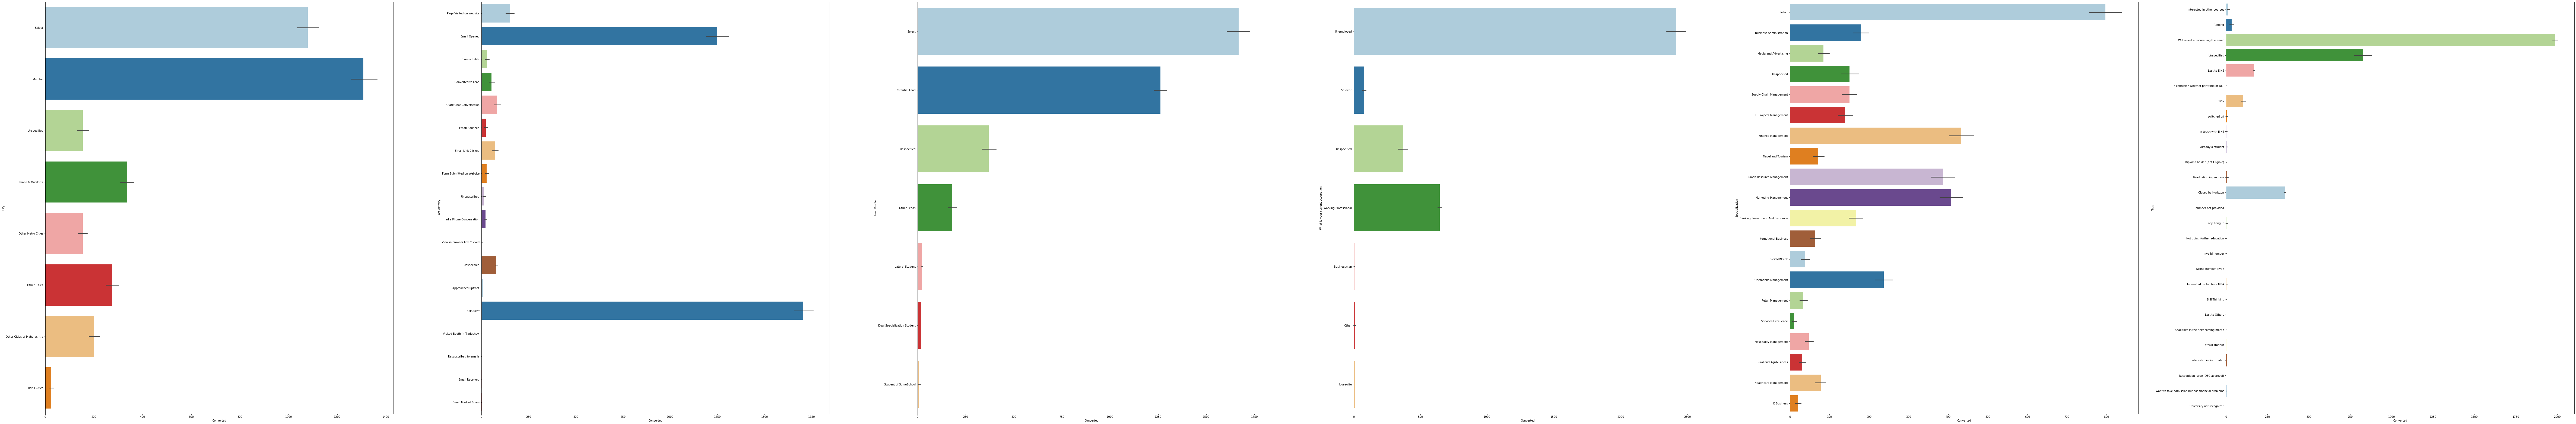

In [42]:
plt.figure(figsize=(200,200))
plt.subplot(9,9,1)
sns.barplot(y='City', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.subplot(9,9,2)
sns.barplot(y='Last Activity', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.subplot(9,9,3)
sns.barplot(y='Lead Profile', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.subplot(9,9,4)
sns.barplot(y='What is your current occupation', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.subplot(9,9,5)
sns.barplot(y='Specialization', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.subplot(9,9,6)
sns.barplot(y='Tags', x='Converted', palette='Paired',  data=score, estimator=np.sum)
plt.tight_layout(pad=5.0)
plt.show()

In [43]:
# Now we check for outliers
score.describe(percentiles=[.10,.25,.5,.75,.90,.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,586357.6,596484.5,615479.0,637409.25,650513.1,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,0.0,1.00,1.0,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,0.0,1.0,3.0,5.00,7.0,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,0.0,14.0,250.0,938.00,1380.0,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,0.0,1.0,2.0,3.00,5.0,9.00,55.0


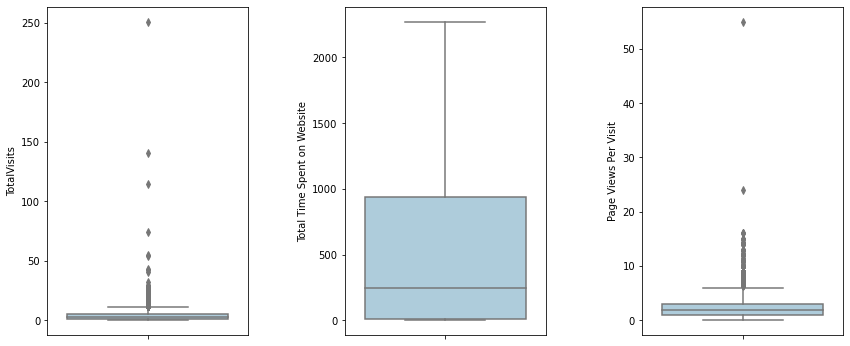

In [44]:
#let's create a boxplot to uderstand more about the outliers
f, axes = plt.subplots(1,3,figsize=(13,6))
#plt.figure(figsize=(12,8))
sns.boxplot(y="TotalVisits", palette="Paired", data=score, ax=axes[0])
sns.boxplot(y="Total Time Spent on Website", palette="Paired", data=score, ax=axes[1])
sns.boxplot(y="Page Views Per Visit", palette="Paired", data=score, ax=axes[2])
plt.tight_layout(pad=5.0)
plt.show()

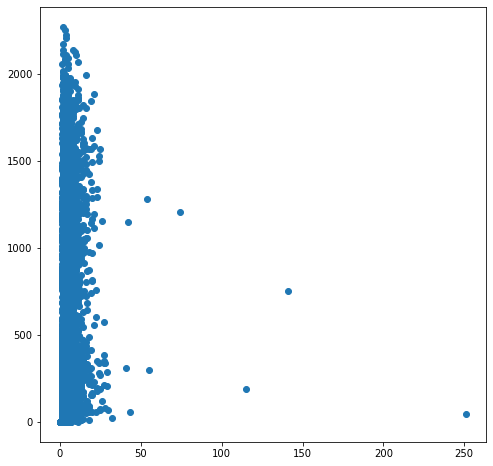

In [45]:
#let's see a graph between TotalVisits vs Total Time spent on website because as much as they visit and spent time on website as much the chance of conversion increses
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(score["TotalVisits"], score["Total Time Spent on Website"])
plt.show()

In [46]:
# Now we remove outliers based on interquartile distance
Qut1=score['TotalVisits'].quantile(0.25)
Qut3=score['TotalVisits'].quantile(0.75)
dif3_1=Qut3-Qut1
score=score.loc[(score['TotalVisits']>=Qut1-1.5*dif3_1)&(score['TotalVisits']<=Qut3+1.5*dif3_1)]
score.shape

(8937, 27)

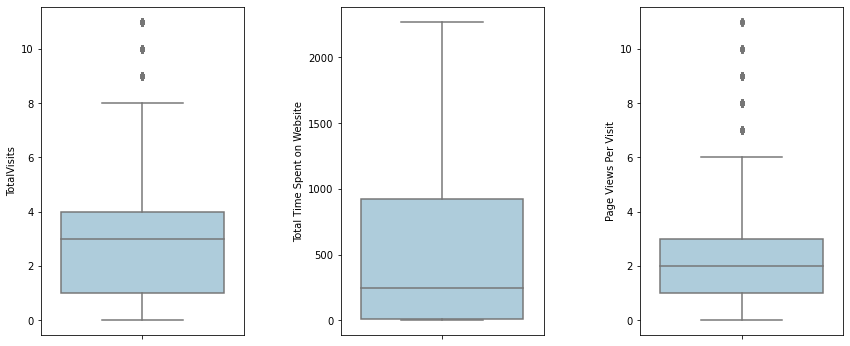

In [47]:
#Checking again the outliers
f, axes = plt.subplots(1,3,figsize=(13,6))

sns.boxplot(y="TotalVisits", palette="Paired", data=score, ax=axes[0])
sns.boxplot(y="Total Time Spent on Website", palette="Paired", data=score, ax=axes[1])
sns.boxplot(y="Page Views Per Visit", palette="Paired", data=score, ax=axes[2])
plt.tight_layout(pad=5.0)
plt.show()

In [48]:
#Converting yes and no into 0 and 1
decesion={"Yes":1, "No":0}
score["Search"]=score["Search"].map(decesion)
score["Do Not Email"]=score["Do Not Email"].map(decesion)
score["Do Not Call"]=score["Do Not Call"].map(decesion)
score["Newspaper Article"]=score["Newspaper Article"].map(decesion)
score["X Education Forums"]=score["X Education Forums"].map(decesion)
score["Newspaper"]=score["Newspaper"].map(decesion)
score["Digital Advertisement"]=score["Digital Advertisement"].map(decesion)
score["Through Recommendations"]=score["Through Recommendations"].map(decesion)
score["A free copy of Mastering The Interview"]=score["A free copy of Mastering The Interview"].map(decesion)

In [49]:
score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,Ringing,Unspecified,Select,Select,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,0,Modified


In [50]:
# Now we start our analysis. 
# 1- Creating dummies

dummy=pd.get_dummies(score[['Country','Lead Source','Lead Origin', 'Last Notable Activity']], drop_first=True)

score = pd.concat([score, dummy], axis=1)
score.shape

(8937, 66)

In [51]:
#for the variables in which we created "unspecified" category we will create dummy for that and drop the unspecified level

sd1=pd.get_dummies(score['Lead Quality'], prefix='Lead Quality')
sd2=sd1.drop(['Lead Quality_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
sd2=sd1.drop(['Asymmetrique Profile Index_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
sd2=sd1.drop(['Asymmetrique Profile Index_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Tags'], prefix='Tags')
sd2=sd1.drop(['Tags_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Lead Profile'], prefix='Lead Profile')
sd2=sd1.drop(['Lead Profile_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['What is your current occupation'], prefix='What is your current occupation')
sd2=sd1.drop(['What is your current occupation_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Specialization'], prefix='Specialization')
sd2=sd1.drop(['Specialization_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['City'], prefix='City')
sd2=sd1.drop(['City_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)

sd1=pd.get_dummies(score['Last Activity'], prefix='Last Activity')
sd2=sd1.drop(['Last Activity_Unspecified'], 1)
score=pd.concat([score,sd2], axis=1)



C:\Users\prate\AppData\Local\Temp\ipykernel_1864\63463309.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sd2=sd1.drop(['Lead Quality_Unspecified'], 1)
C:\Users\prate\AppData\Local\Temp\ipykernel_1864\63463309.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sd2=sd1.drop(['Asymmetrique Profile Index_Unspecified'], 1)
C:\Users\prate\AppData\Local\Temp\ipykernel_1864\63463309.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sd2=sd1.drop(['Asymmetrique Profile Index_Unspecified'], 1)
C:\Users\prate\AppData\Local\Temp\ipykernel_1864\63463309.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sd2=sd1.drop(['Tags_Unspecified'], 1)
C:

In [52]:
score.shape

(8937, 158)

In [53]:
# dropping the variables for which we have created the dummies
score = score.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile','Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 'Lead Source','Last Notable Activity'],1)
score.shape

C:\Users\prate\AppData\Local\Temp\ipykernel_1864\2674194541.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  score = score.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile','Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 'Lead Source','Last Notable Activity'],1)


(8937, 145)

In [54]:
score.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#creating a copy of orignal data in case we need
real_score=score.copy()
print(real_score.shape)
print(score.dtypes)

(8937, 145)
Lead Number                                     int64
Do Not Email                                    int64
Do Not Call                                     int64
Converted                                       int64
TotalVisits                                   float64
                                               ...   
Last Activity_SMS Sent                          uint8
Last Activity_Unreachable                       uint8
Last Activity_Unsubscribed                      uint8
Last Activity_View in browser link Clicked      uint8
Last Activity_Visited Booth in Tradeshow        uint8
Length: 145, dtype: object


In [56]:
#2. We will do test-train data split
x = score.drop(['Converted','Lead Number'], axis=1)
x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y=score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
#Splitting

x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.7, test_size=0.3, random_state=100)

In [59]:
# Scaling
scaler=StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


#checking X-train dataset after scaling
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6130,0,0,-1.158262,-0.878609,-1.168324,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6670,0,0,0.779714,-0.769792,1.414641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6858,0,0,1.167309,0.831641,-0.135138,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
984,0,0,0.004523,-0.546716,0.381455,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5614,0,0,0.392119,-0.234772,0.898048,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [60]:
x_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6255.000000,6255.000000,6.255000e+03,6.255000e+03,6.255000e+03,6255.000000,6255.000000,6255.0,6255.000000,6255.00000,...,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.0
mean,0.075779,0.000160,2.502395e-16,-7.759137e-17,1.161696e-16,0.001279,0.000160,0.0,0.000160,0.00032,...,0.011990,0.002718,0.107914,0.061871,0.000160,0.295604,0.010072,0.006395,0.000799,0.0
std,0.264666,0.012644,1.000080e+00,1.000080e+00,1.000080e+00,0.035743,0.012644,0.0,0.012644,0.01788,...,0.108851,0.052066,0.310296,0.240939,0.012644,0.456350,0.099860,0.079718,0.028264,0.0
min,0.000000,0.000000,-1.158262e+00,-8.786093e-01,-1.168324e+00,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,-7.706669e-01,-8.695412e-01,-6.517314e-01,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,4.523493e-03,-4.433389e-01,-1.351384e-01,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,3.921187e-01,8.125978e-01,3.814546e-01,0.000000,0.000000,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,3.105285e+00,3.241951e+00,4.514198e+00,1.000000,1.000000,0.0,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [61]:
# Lead Conversion Rate

Conversion = (sum(score['Converted'])/len(score['Converted'].index))
Conversion

0.38211927940024615

In [62]:
# Model Building
import statsmodels.api as sm
#score = score.astype(float)

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)


C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\prate\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [64]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [65]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 9),
 ('Do Not Call', False, 59),
 ('TotalVisits', False, 62),
 ('Total Time Spent on Website', False, 16),
 ('Page Views Per Visit', False, 61),
 ('Search', False, 90),
 ('Newspaper Article', False, 98),
 ('X Education Forums', False, 126),
 ('Newspaper', False, 87),
 ('Digital Advertisement', False, 86),
 ('Through Recommendations', False, 92),
 ('A free copy of Mastering The Interview', False, 82),
 ('Country_Other Country', False, 103),
 ('Lead Source_Direct Traffic', False, 52),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 54),
 ('Lead Source_Live Chat', False, 120),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', False, 17),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Pay per Click Ads', False, 127),
 ('Lead Source_Press_Release', False, 125),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 71),
 ('Lead Source_WeLearn', False, 121)

In [66]:
col=x_train.columns[rfe.support_]
col

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Activity_SMS Sent'],
      dtype='object')

In [67]:
x_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=128)

In [68]:
x_train_sm=sm.add_constant(x_train[col])
lm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = lm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6239
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1518.0
Date:                Tue, 18 Oct 2022   Deviance:                       3036.0
Time:                        21:41:22   Pearson chi2:                 8.05e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5701
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9535      0.068    -28.552      0.000      -2.088      -1.819
Lead Source_Welingak Website                 4.5597      0.731      6.238      0.000       3.127       5.992
Lead Quality_Worst                          -2.4779      0.705     -3.517      0.000      -3.859      -1.097
Tags_Already a student                      -2.4464      0.725     -3.374      0.001      -3.867      -1.025
Tags_Closed by Horizzon                      6.5877      0.714      9.230      0.000       5.189       7.987
Tags_Interested  in full time MBA           -1.7458      0.736     -2.373      0.018      -3.188      -0.304
Tags_Interested in other courses            -1.6570      0.333     -4.971      0.000      -2.310      -1.004
Tags_Lost to EINS                            5.7311      0.630      9.096      0.000       4.496       6.966
Tags_Not doing further education            -2.3430      1.033     -2.268      0.023      -4.368      -0.319
Tags_Ringing                                -2.8615      0.220    -12.983      0.000      -3.294      -2.430
Tags_Will revert after reading the email     4.7158      0.166     28.484      0.000       4.391       5.040
Tags_invalid number                        -23.3668   1.72e+04     -0.001      0.999   -3.37e+04    3.36e+04
Tags_number not provided                   -23.5663   2.74e+04     -0.001      0.999   -5.37e+04    5.36e+04
Tags_switched off                           -3.9041      0.718     -5.434      0.000      -5.312      -2.496
Tags_wrong number given                    -23.7321   2.07e+04     -0.001      0.999   -4.07e+04    4.06e+04
Last Activity_SMS Sent                       2.2326      0.101     22.185      0.000       2.035       2.430
============================================================================================================
"""

In [69]:
# dropping columns with high p-value
x_train_sm=x_train_sm.drop("Tags_number not provided",1)

C:\Users\prate\AppData\Local\Temp\ipykernel_1864\495940097.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_sm=x_train_sm.drop("Tags_number not provided",1)


In [70]:
lm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1523.9
Date:                Tue, 18 Oct 2022   Deviance:                       3047.8
Time:                        21:41:23   Pearson chi2:                 8.06e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5693
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9613      0.068    -28.676      0.000      -2.095      -1.827
Lead Source_Welingak Website                 4.5694      0.731      6.252      0.000       3.137       6.002
Lead Quality_Worst                          -2.5267      0.697     -3.627      0.000      -3.892      -1.161
Tags_Already a student                      -2.4301      0.724     -3.355      0.001      -3.850      -1.010
Tags_Closed by Horizzon                      6.5960      0.714      9.242      0.000       5.197       7.995
Tags_Interested  in full time MBA           -1.7331      0.736     -2.356      0.018      -3.175      -0.291
Tags_Interested in other courses            -1.6458      0.333     -4.939      0.000      -2.299      -0.993
Tags_Lost to EINS                            5.7516      0.632      9.104      0.000       4.513       6.990
Tags_Not doing further education            -2.3267      1.033     -2.253      0.024      -4.351      -0.303
Tags_Ringing                                -2.8454      0.220    -12.918      0.000      -3.277      -2.414
Tags_Will revert after reading the email     4.7250      0.166     28.544      0.000       4.401       5.049
Tags_invalid number                        -23.3491   1.72e+04     -0.001      0.999   -3.37e+04    3.36e+04
Tags_switched off                           -3.8874      0.718     -5.411      0.000      -5.295      -2.479
Tags_wrong number given                    -23.7152   2.07e+04     -0.001      0.999   -4.07e+04    4.06e+04
Last Activity_SMS Sent                       2.2224      0.100     22.151      0.000       2.026       2.419
============================================================================================================
"""

In [71]:
# again droping the high p-value
x_train_sm = x_train_sm.drop("Tags_invalid number",1)

C:\Users\prate\AppData\Local\Temp\ipykernel_1864\1190710003.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_sm = x_train_sm.drop("Tags_invalid number",1)


In [72]:
lm3 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6241
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.0
Date:                Tue, 18 Oct 2022   Deviance:                       3072.0
Time:                        21:41:23   Pearson chi2:                 8.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5676
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9779      0.068    -28.941      0.000      -2.112      -1.844
Lead Source_Welingak Website                 4.5895      0.731      6.281      0.000       3.157       6.022
Lead Quality_Worst                          -2.7364      0.665     -4.115      0.000      -4.040      -1.433
Tags_Already a student                      -2.3845      0.722     -3.301      0.001      -3.800      -0.969
Tags_Closed by Horizzon                      6.6144      0.714      9.268      0.000       5.216       8.013
Tags_Interested  in full time MBA           -1.7032      0.735     -2.317      0.021      -3.144      -0.262
Tags_Interested in other courses            -1.6210      0.333     -4.868      0.000      -2.274      -0.968
Tags_Lost to EINS                            5.8260      0.640      9.109      0.000       4.572       7.080
Tags_Not doing further education            -2.2861      1.032     -2.214      0.027      -4.310      -0.262
Tags_Ringing                                -2.8130      0.220    -12.786      0.000      -3.244      -2.382
Tags_Will revert after reading the email     4.7450      0.166     28.666      0.000       4.421       5.069
Tags_switched off                           -3.8538      0.718     -5.365      0.000      -5.262      -2.446
Tags_wrong number given                    -22.6788   1.26e+04     -0.002      0.999   -2.47e+04    2.46e+04
Last Activity_SMS Sent                       2.2030      0.100     22.090      0.000       2.007       2.398
============================================================================================================
"""

In [73]:
# Again we drop the high p-value column
x_train_sm=x_train_sm.drop("Tags_wrong number given",1)

C:\Users\prate\AppData\Local\Temp\ipykernel_1864\3256332809.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train_sm=x_train_sm.drop("Tags_wrong number given",1)


In [74]:
lm4 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6255
Model:                            GLM   Df Residuals:                     6242
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1547.3
Date:                Tue, 18 Oct 2022   Deviance:                       3094.7
Time:                        21:41:23   Pearson chi2:                 8.14e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5660
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9899      0.068    -29.128      0.000      -2.124      -1.856
Lead Source_Welingak Website                 4.6061      0.731      6.305      0.000       3.174       6.038
Lead Quality_Worst                          -2.7938      0.657     -4.253      0.000      -4.081      -1.506
Tags_Already a student                      -2.3621      0.722     -3.272      0.001      -3.777      -0.947
Tags_Closed by Horizzon                      6.6272      0.714      9.286      0.000       5.228       8.026
Tags_Interested  in full time MBA           -1.6829      0.735     -2.290      0.022      -3.123      -0.243
Tags_Interested in other courses            -1.6026      0.333     -4.816      0.000      -2.255      -0.950
Tags_Lost to EINS                            5.8553      0.642      9.122      0.000       4.597       7.113
Tags_Not doing further education            -2.2596      1.032     -2.190      0.029      -4.282      -0.237
Tags_Ringing                                -2.7812      0.220    -12.658      0.000      -3.212      -2.351
Tags_Will revert after reading the email     4.7602      0.165     28.768      0.000       4.436       5.084
Tags_switched off                           -3.8209      0.718     -5.320      0.000      -5.228      -2.413
Last Activity_SMS Sent                       2.1785      0.099     21.972      0.000       1.984       2.373
============================================================================================================
"""

In [75]:
# Now p-value looks good so we calculate VIF once
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x_train_sm.columns
vif["VIF"]=[variance_inflation_factor(x_train_sm.values,i) for i in range (x_train_sm.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,2.72
2,Lead Quality_Worst,1.65
3,Tags_Already a student,1.56
10,Tags_Will revert after reading the email,1.25
8,Tags_Not doing further education,1.14
9,Tags_Ringing,1.14
12,Last Activity_SMS Sent,1.13
6,Tags_Interested in other courses,1.12
4,Tags_Closed by Horizzon,1.06
5,Tags_Interested in full time MBA,1.05


In [76]:
#Now predicting a train model
y_train_pred=res.predict(x_train_sm)
y_train_pred.head()

6130    0.120266
6670    0.001682
6858    0.025772
984     0.006913
5614    0.000788
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.20266492e-01, 1.68166374e-03, 2.57721712e-02, 6.91329841e-03,
       7.87525767e-04, 8.29574098e-03, 1.20266492e-01, 9.90409177e-01,
       9.90409177e-01, 8.39992347e-03])

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob': y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.120266,6130
1,0,0.001682,6670
2,0,0.025772,6858
3,0,0.006913,984
4,0,0.000788,5614


In [79]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.120266,6130,0
1,0,0.001682,6670,0
2,0,0.025772,6858,0
3,0,0.006913,984,0
4,0,0.000788,5614,0


In [80]:
# Now we calculate Accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive value and Negative Predictive Value
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3525,  344],
       [ 269, 2117]], dtype=int64)

In [81]:
# Overall Accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9019984012789768


In [82]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [83]:
#Sensitivity
TP/float(TP+FN)

0.8872590108968986

In [84]:
#Specificity
TN/float(TN+FP)

0.9110881364693719

In [85]:
# False Positive Rate
FP/float(TN+FP)

0.08891186353062806

In [86]:
#positive predictive value
TP/float(TP+FP)

0.860219422998781

In [87]:
#Negative predictive rate
TN/float(TN+FN)

0.9290985767000527

In [88]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [89]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted, drop_intermediate = False )

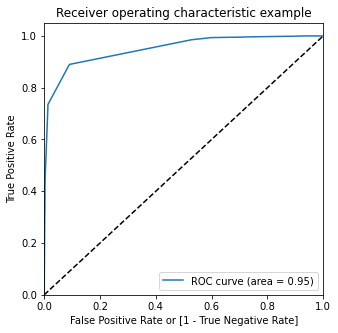

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.58464720e-04,
        2.58464720e-04, 2.06771776e-03, 2.58464720e-03, 2.84311192e-03,
        2.84311192e-03, 3.61850607e-03, 3.61850607e-03, 1.31817007e-02,
        1.31817007e-02, 1.31817007e-02, 8.89118635e-02, 8.91703283e-02,
        9.09795813e-02, 9.14965107e-02, 5.30111140e-01, 5.31144999e-01,
        5.31920393e-01, 5.99896614e-01, 6.02739726e-01, 6.72525200e-01,
        6.89583872e-01, 7.03799431e-01, 7.04574826e-01, 7.13362626e-01,
        7.13879555e-01, 7.43602998e-01, 8.76712329e-01, 8.87567847e-01,
        8.88084776e-01, 8.90152494e-01, 9.15223572e-01, 9.30214526e-01,
        9.30731455e-01, 9.36676144e-01, 9.49857844e-01, 9.99224606e-01,
        9.99741535e-01, 1.00000000e+00]),
 array([0.        , 0.00293378, 0.003772  , 0.00419111, 0.00796312,
        0.00838223, 0.01047779, 0.01592624, 0.0217938 , 0.31601006,
        0.33361274, 0.41911148

In [90]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [91]:
# Lets find most optimal cutoffs
dump = [float(x)/10 for x in range(10)]
for i in dump:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.120266,6130,0,1,1,0,0,0,0,0,0,0,0
1,0,0.001682,6670,0,1,0,0,0,0,0,0,0,0,0
2,0,0.025772,6858,0,1,0,0,0,0,0,0,0,0,0
3,0,0.006913,984,0,1,0,0,0,0,0,0,0,0,0
4,0,0.000788,5614,0,1,0,0,0,0,0,0,0,0,0


In [92]:
#Lets find sensitivity, accuracyand specificity for all points)

every_df = pd.DataFrame( columns = ['probab','accuracy','sensitivity','specificity'])


dump = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in dump:
    ans1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(ans1))
    accuracy = (ans1[0,0]+ans1[1,1])/total1
    
    specificity = ans1[0,0]/(ans1[0,0]+ans1[0,1])
    sensitivity = ans1[1,1]/(ans1[1,0]+ans1[1,1])
    every_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(every_df)

     probab  accuracy  sensitivity  specificity
0.0     0.0  0.381455     1.000000     0.000000
0.1     0.1  0.665548     0.985750     0.468080
0.2     0.2  0.901839     0.887259     0.910830
0.3     0.3  0.901839     0.887259     0.910830
0.4     0.4  0.901839     0.887259     0.910830
0.5     0.5  0.901998     0.887259     0.911088
0.6     0.6  0.890647     0.734702     0.986818
0.7     0.7  0.890647     0.734702     0.986818
0.8     0.8  0.890008     0.733026     0.986818
0.9     0.9  0.890008     0.733026     0.986818


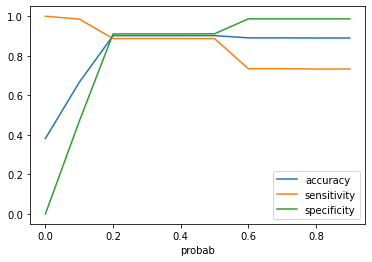

In [93]:
every_df.plot.line(x='probab', y=['accuracy','sensitivity','specificity'])
plt.show()

In [94]:
#Let's take cutoff 0.52
y_train_pred_final['final_predicted']=y_train_pred_final.Converted_prob.map(lambda x:1 if x>0.52 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.120266,6130,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.001682,6670,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.025772,6858,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.006913,984,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000788,5614,0,1,0,0,0,0,0,0,0,0,0,0


In [95]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9019984012789768

In [96]:
cmetric1=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
cmetric1

array([[3525,  344],
       [ 269, 2117]], dtype=int64)

In [97]:
TP = cmetric1[1,1]
TN = cmetric1[0,0]
FP = cmetric1[0,1]
FN = cmetric1[1,0]

In [98]:
#Sensitivity
TP/float(TP+FN)

0.8872590108968986

In [99]:
#Specificity
TN/float(TN+FP)

0.9110881364693719

In [100]:
# False Positive Rate
FP/float(TN+FP)

0.08891186353062806

In [101]:
# Positive predictive value
TP/float(TP+FP)

0.860219422998781

In [102]:
#Negative predictive value
TN/float(TN+FN)

0.9290985767000527

In [103]:
# Precision and Recall

precision=TP/(FP+TP)
precision

0.860219422998781

In [104]:
recall = TP/(FN+TP)
recall

0.8872590108968986

In [105]:
from sklearn.metrics import precision_score, recall_score

In [106]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.860219422998781

In [107]:
#Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

In [108]:
pre, re, threshold= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

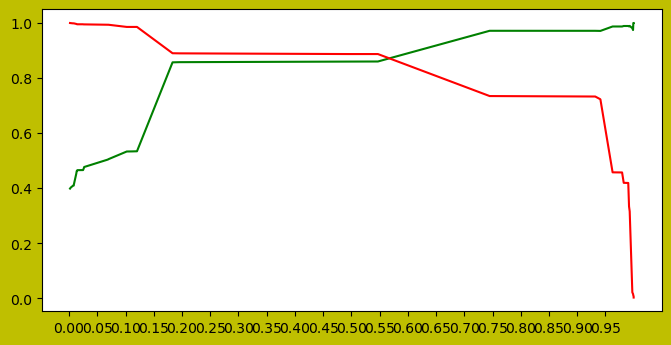

In [109]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='y', edgecolor='g', frameon='True')
plt.plot(threshold, pre[:-1], "g-")
plt.plot(threshold, re[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [110]:
# Here the cutoff value is near 0.55 and we have choose 0.35.
#Our requirement is 80% of conversion rate and we have achived it so we stick with 0.35

In [111]:
#F1-score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8735300185681866

In [112]:
#Making predictions on test set

x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
2482,0,0,0.779714,-0.095122,1.414641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3986,0,0,0.779714,-0.599311,1.414641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,0,0,-0.383072,-0.588429,-0.135138,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4927,0,0,-0.383072,2.376851,-0.135138,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8947,1,0,-0.383072,-0.668229,-0.135138,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
x_test=x_test[col]
x_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,Last Activity_SMS Sent
2482,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3986,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4927,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
x_test_sm=x_test.drop(["Tags_invalid number","Tags_number not provided","Tags_wrong number given"],axis=1)


In [115]:
#Adding Constant
x_test_sm=sm.add_constant(x_test_sm)

In [116]:
#Making prediction on test set
y_test_pred = res.predict(x_test_sm)

In [117]:
y_test_pred_d=pd.DataFrame(y_test_pred)

In [118]:
y_test_df=pd.DataFrame(y_test)

In [119]:
y_test_df['Lead ID']=y_test_df.index

In [120]:
y_test_pred_d.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
y_final=pd.concat([y_test_df,y_test_pred_d],axis=1)

In [122]:
y_final.head()

,Converted,Lead ID,0
0,0,2482,0.026791
1,0,3986,0.008400
2,1,7785,0.546997
3,1,4927,0.992958
4,0,8947,0.120266


In [123]:
y_final=y_final.rename(columns={0:'C_Porbablity'})

In [124]:

y_final['final_predicted'] = y_final.C_Porbablity.map(lambda x: 1 if x > 0.33 else 0)

In [125]:
y_final.head()

,Converted,Lead ID,C_Porbablity,final_predicted
0,0,2482,0.026791,0
1,0,3986,0.008400,0
2,1,7785,0.546997,1
3,1,4927,0.992958,1
4,0,8947,0.120266,0


In [126]:
accuracy_score=metrics.accuracy_score(y_final.Converted, y_final.final_predicted)
accuracy_score

0.901565995525727

In [127]:
confusion_m = metrics.confusion_matrix(y_final.Converted, y_final.final_predicted )
print(confusion_m)

[[1500  153]
 [ 111  918]]


In [128]:
TP = confusion_m[1,1]
TN = confusion_m[0,0]
FP = confusion_m[0,1]
FN = confusion_m[1,0]

In [129]:
#Sensitivity
TP/float(TP+FN)

0.892128279883382

In [130]:
#Specificity
TN/float(TN+FP)

0.9074410163339383

In [131]:
#False Positive Rate
FP/float(TN+FP)

0.0925589836660617

In [132]:
#Positive Predictive Value
TP/float(TP+FP)

0.8571428571428571

In [133]:
#Negative Predicted Value
TN/float(TN+FN)

0.931098696461825

In [134]:
#Precision
Precision=TP/(TP+FP)
Precision

0.8571428571428571

In [135]:
#Recall
Recall=TP/(TP+FN)
Recall

0.892128279883382

In [136]:
F1=2*(Precision*Recall)/(Precision+Recall)
F1

0.8742857142857142

In [137]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [138]:

fpr, tpr, thresholds = metrics.roc_curve( y_final.Converted, y_final.C_Porbablity, drop_intermediate = False )

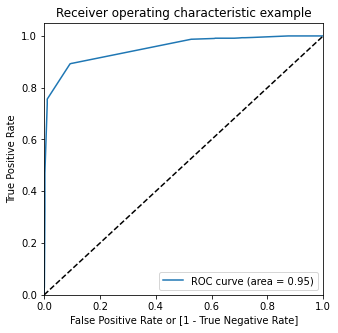

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.04960678e-04,
        2.41984271e-03, 2.41984271e-03, 2.41984271e-03, 2.41984271e-03,
        1.08892922e-02, 1.08892922e-02, 1.08892922e-02, 9.25589837e-02,
        9.80036298e-02, 9.92135511e-02, 5.27525711e-01, 5.28735632e-01,
        5.30550514e-01, 6.09800363e-01, 6.12825166e-01, 6.81185723e-01,
        6.98124622e-01, 7.09013914e-01, 7.09618875e-01, 7.19903206e-01,
        7.46521476e-01, 8.74773140e-01, 8.86872353e-01, 8.87477314e-01,
        8.88082275e-01, 9.09255898e-01, 9.24984876e-01, 9.30429522e-01,
        9.45553539e-01, 9.99395039e-01, 1.00000000e+00]),
 array([0.00000000e+00, 9.71817298e-04, 3.88726919e-03, 9.71817298e-03,
        1.06899903e-02, 1.26336249e-02, 2.04081633e-02, 3.01263362e-02,
        3.31389699e-01, 3.50826045e-01, 4.33430515e-01, 4.69387755e-01,
        7.37609329e-01, 7.52186589e-01, 7.56073858e-01, 8.92128280e-01,
      

In [139]:

draw_roc(y_final.Converted, y_final.C_Porbablity)